In [1]:
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [2]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [3]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
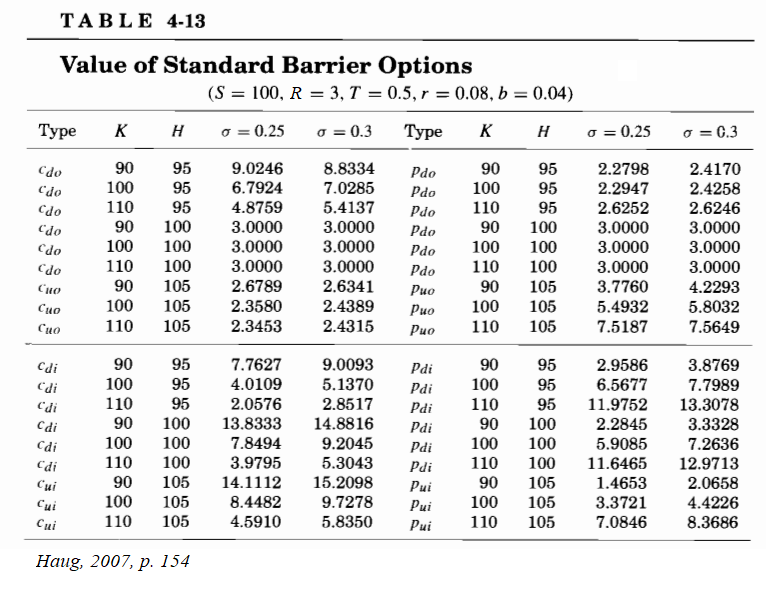

In [4]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [5]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

In [6]:
K_values = [90, 100, 110]
H_values = [95, 100, 105]
sigma_values = [0.25, 0.3]
option_types = [
    ("Down-and-out", True),  # c_do
    ("Down-and-out", False),  # p_do
    ("Up-and-out", True),  # c_uo
    ("Up-and-out", False),  # p_uo
    ("Down-and-in", True),  # c_di
    ("Down-and-in", False),  # p_di
    ("Up-and-in", True),  # c_ui
    ("Up-and-in", False),  # p_ui
]

# Генерация таблицы результатов
def generate_table():
    table_data = []
    for option_type, is_call in option_types:
        for K in K_values:
            for H in H_values:
                for sigma in sigma_values:
                    price = barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)
                    table_data.append({
                        "Type": f"{'c' if is_call else 'p'}_{option_type.split('-')[0][0]}{option_type.split('-')[1][0]}",
                        "K": K,
                        "H": H,
                        "Sigma": sigma,
                        "Price": round(price, 4)
                    })
    table_df = pd.DataFrame(table_data)
    final_table = table_df.pivot_table(index=["Type", "K", "H"], columns="Sigma", values="Price")
    final_table.columns = [f"σ={col}" for col in final_table.columns]
    final_table.reset_index(inplace=True)
    return final_table

# Построение поверхностей
def plot_surface(option_type, is_call, sigma):
    H, K = np.meshgrid(H_values, K_values)
    prices = np.zeros_like(H, dtype=float)
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            prices[i, j] = barrier_option(option_type, S, H[i, j], K[i, j], R, T, r, b, sigma, is_call)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(H, K, prices, cmap="viridis", edgecolor="k")
    ax.set_title(f"Surface for {option_type}, Call: {is_call}, Sigma: {sigma}")
    ax.set_xlabel("Barrier (H)")
    ax.set_ylabel("Strike (K)")
    ax.set_zlabel("Option Price")
    plt.show()

# Генерация таблицы
final_table = generate_table()
final_table

,Type,K,H,σ=0.25,σ=0.3
0,c_Da,90,95,8.39365,8.92135
1,c_Da,90,100,8.41665,8.94080
2,c_Da,90,105,8.44825,8.96570
3,c_Da,100,95,5.40165,6.08275
4,c_Da,100,100,5.42470,6.10225
5,c_Da,100,105,5.45635,6.12715
6,c_Da,110,95,3.46675,4.13270
7,c_Da,110,100,3.48975,4.15215
8,c_Da,110,105,3.52135,4.17705
9,c_Ua,90,95,8.44890,8.96765


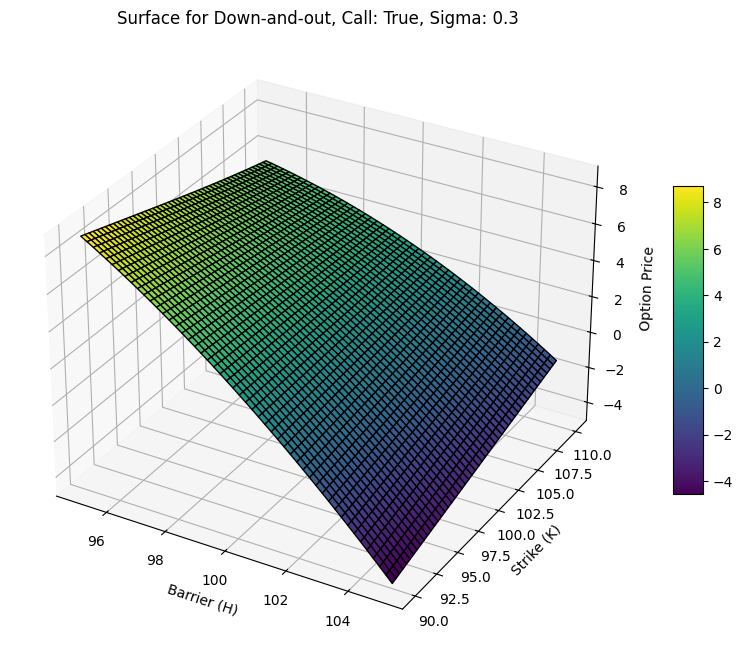

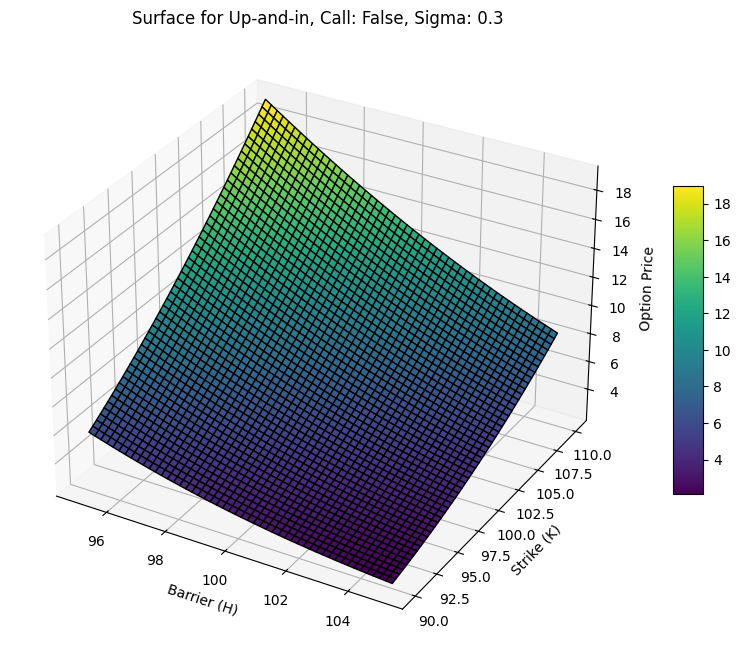

In [7]:
# Построение поверхностей с большим числом точек
def plot_detailed_surface(option_type, is_call, sigma, num_points=50):
    """
    Построение 3D поверхности с большим числом точек
    """
    H_values_detailed = np.linspace(min(H_values), max(H_values), num_points)
    K_values_detailed = np.linspace(min(K_values), max(K_values), num_points)
    H, K = np.meshgrid(H_values_detailed, K_values_detailed)
    prices = np.zeros_like(H, dtype=float)

    # Вычисление цены для каждого сочетания K и H
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            prices[i, j] = barrier_option(option_type, S, H[i, j], K[i, j], R, T, r, b, sigma, is_call)

    # Построение графика
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(H, K, prices, cmap="viridis", edgecolor="k")
    ax.set_title(f"Surface for {option_type}, Call: {is_call}, Sigma: {sigma}")
    ax.set_xlabel("Barrier (H)")
    ax.set_ylabel("Strike (K)")
    ax.set_zlabel("Option Price")
    fig.colorbar(surface, shrink=0.5, aspect=10)
    plt.show()

# Построение для Down-and-out Call при σ = 0.3
plot_detailed_surface("Down-and-out", True, 0.3)

# Построение для Up-and-in Put при σ = 0.3
plot_detailed_surface("Up-and-in", False, 0.3)

# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

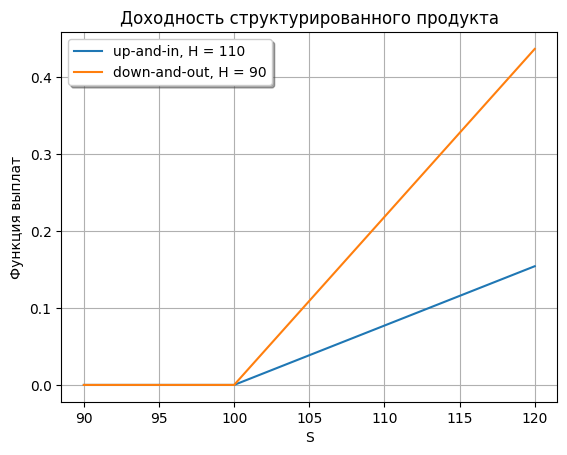

In [8]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

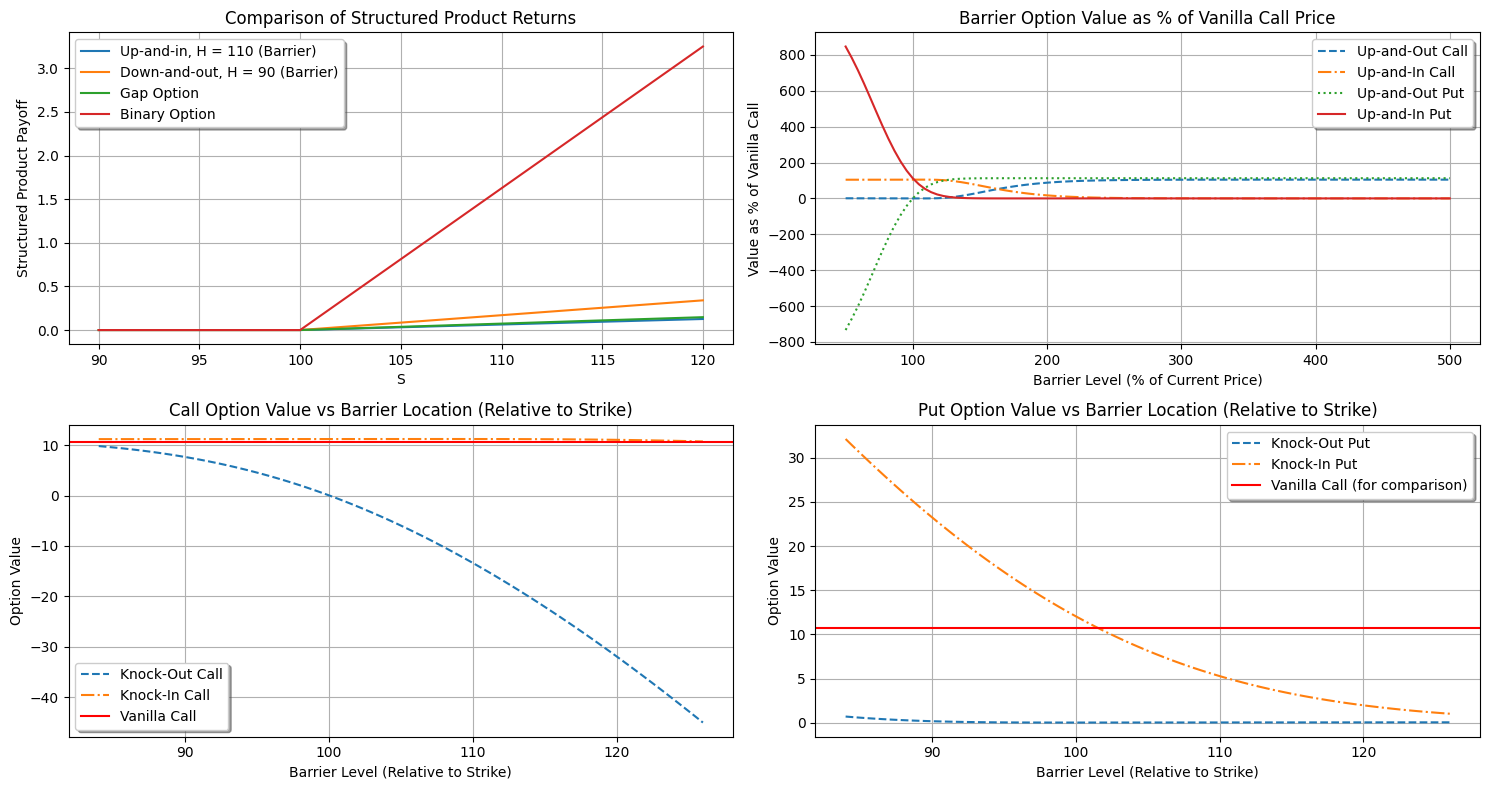

In [9]:
def binary_option_call(option_type, S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'cash-or-nothing':
        return np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'asset-or-nothing':
        return S * np.exp(-q * T) * norm.cdf(d1)

def gap_option_price_call(S, K1, K2, T, r, q, sigma):
    d1 = (np.log(S / K2) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K1 * np.exp(-r * T) * norm.cdf(d2)

def vanilla_call_price(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def structured_payoff(option_price, strike, N, S_data, S0):
    Q = (N - da) / option_price if option_price > 0 else 0
    PR = strike * Q / N
    return np.maximum(r_sp_min, r_sp_min + PR * (S_data - S0) / S0)


fig, axes = plt.subplots(2, 2, figsize=(15, 8))


H_up_in, K_up_in = 110, 105
call_up_in = barrier_option('Up-and-in', S0, H_up_in, K_up_in, q, T, r, q, sigma, True)

H_down_out, K_down_out = 90, 120
call_down_out = barrier_option('Down-and-out', S0, H_down_out, K_down_out, q, T, r, q, sigma, True)

gap_call = gap_option_price_call(S0, K1=K_up_in, K2=K_down_out, T=T, r=r, q=q, sigma=sigma)
binary_call = binary_option_call('cash-or-nothing', S0, K_up_in, T, r, q, sigma)


capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee


r_sp_up_in = structured_payoff(call_up_in, K_up_in, N, S_data, S0)
r_sp_down_out = structured_payoff(call_down_out, K_down_out, N, S_data, S0)
r_sp_gap = structured_payoff(gap_call, K_up_in, N, S_data, S0)
r_sp_binary = structured_payoff(binary_call, K_up_in, N, S_data, S0)

vanilla_call = vanilla_call_price(S0, K_up_in, T, r, q, sigma)
barrier_levels = np.linspace(50, 500, 100)


up_and_out_call = [
    barrier_option('Up-and-out', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels
]
up_and_in_call = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels
]
up_and_out_put = [
    barrier_option('Up-and-out', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels
]
up_and_in_put = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels
]

up_and_out_call_pct = [v / vanilla_call * 100 for v in up_and_out_call]
up_and_in_call_pct = [v / vanilla_call * 100 for v in up_and_in_call]
up_and_out_put_pct = [v / vanilla_call * 100 for v in up_and_out_put]
up_and_in_put_pct = [v / vanilla_call * 100 for v in up_and_in_put]

vanilla_call = vanilla_call_price(S0, K_up_in, T, r, q, sigma)
barrier_levels_relative = np.linspace(0.8 * K_up_in, 1.2 * K_up_in, 100)

knock_out_call_values = [
    barrier_option('Down-and-out', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels_relative
]
knock_in_call_values = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels_relative
]
knock_out_put_values = [
    barrier_option('Down-and-out', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels_relative
]
knock_in_put_values = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels_relative
]

vanilla_put = vanilla_call_price(S0, K_up_in, T, r, q, sigma)

axes[0, 0].plot(S_data, r_sp_up_in, label='Up-and-in, H = 110 (Barrier)', linestyle='-')
axes[0, 0].plot(S_data, r_sp_down_out, label='Down-and-out, H = 90 (Barrier)', linestyle='-')
axes[0, 0].plot(S_data, r_sp_gap, label='Gap Option', linestyle='-')
axes[0, 0].plot(S_data, r_sp_binary, label='Binary Option', linestyle='-')
axes[0, 0].set_title('Comparison of Structured Product Returns')
axes[0, 0].set_xlabel('S')
axes[0, 0].set_ylabel('Structured Product Payoff')
axes[0, 0].legend(loc='best', fancybox=True, shadow=True)
axes[0, 0].grid(True)

axes[0, 1].plot(barrier_levels, up_and_out_call_pct, label='Up-and-Out Call', linestyle='--')
axes[0, 1].plot(barrier_levels, up_and_in_call_pct, label='Up-and-In Call', linestyle='-.')
axes[0, 1].plot(barrier_levels, up_and_out_put_pct, label='Up-and-Out Put', linestyle=':')
axes[0, 1].plot(barrier_levels, up_and_in_put_pct, label='Up-and-In Put', linestyle='-')
axes[0, 1].set_title('Barrier Option Value as % of Vanilla Call Price')
axes[0, 1].set_xlabel('Barrier Level (% of Current Price)')
axes[0, 1].set_ylabel('Value as % of Vanilla Call')
axes[0, 1].grid(True)
axes[0, 1].legend(loc='best', fancybox=True, shadow=True)

axes[1, 0].plot(barrier_levels_relative, knock_out_call_values, label='Knock-Out Call', linestyle='--')
axes[1, 0].plot(barrier_levels_relative, knock_in_call_values, label='Knock-In Call', linestyle='-.')
axes[1, 0].axhline(y=vanilla_call, color='r', linestyle='-', label='Vanilla Call')
axes[1, 0].set_title('Call Option Value vs Barrier Location (Relative to Strike)')
axes[1, 0].set_xlabel('Barrier Level (Relative to Strike)')
axes[1, 0].set_ylabel('Option Value')
axes[1, 0].grid(True)
axes[1, 0].legend(loc='best', fancybox=True, shadow=True)

axes[1, 1].plot(barrier_levels_relative, knock_out_put_values, label='Knock-Out Put', linestyle='--')
axes[1, 1].plot(barrier_levels_relative, knock_in_put_values, label='Knock-In Put', linestyle='-.')
axes[1, 1].axhline(y=vanilla_put, color='r', linestyle='-', label='Vanilla Call (for comparison)')
axes[1, 1].set_title('Put Option Value vs Barrier Location (Relative to Strike)')
axes[1, 1].set_xlabel('Barrier Level (Relative to Strike)')
axes[1, 1].set_ylabel('Option Value')
axes[1, 1].legend(loc='best', fancybox=True, shadow=True)
axes[1, 1].grid()

fig.tight_layout()
plt.show()

# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [10]:
# Попробуем повторно загрузить данные с учетом разделителя и попыткой очистки столбцов
data = pd.read_csv('CBBC.csv', sep=',', skiprows=0)

# Удалим любые пустые строки и обработаем некорректные заголовки
data = data.rename(columns=lambda x: x.strip()).dropna(how='all')

# Вывод столбцов для проверки
data

,0,Trade Date No. of,CBBC,Bought * Average,price * No. of,CBBC.1,Sold * Average,price * O/S * O/S *,(%) Total Issue,Size * Trading,...,/Bear CBBC,Type CBBC,Category Listing,Date,Last Trading Date Maturity,Date MCE Strike/Call,Currency Strike Level Call,Level Ent.,Ratio^ Delisting,Date **
0,22-11-2024,"135,000",0.111815,"(25,000)",(0.112000),"770,000",0.77,"100,000,000",HKD,0.115,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
1,21-11-2024,"10,000",0.104500,"(100,000)",(0.104000),"880,000",0.88,"100,000,000",HKD,0.105,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
2,20-11-2024,"110,000",0.106409,"(95,000)",(0.109421),"790,000",0.79,"100,000,000",HKD,0.111,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
3,19-11-2024,"385,000",0.103117,"(320,000)",(0.103250),"805,000",0.80,"100,000,000",HKD,0.109,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
4,18-11-2024,"325,000",0.096538,"(245,000)",(0.095429),"870,000",0.87,"100,000,000",HKD,0.098,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,01-12-2023,0,0.000000,0,0.000000,"5,000",0.01,"100,000,000",HKD,0.000,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
240,30-11-2023,0,0.000000,0,0.000000,"5,000",0.01,"100,000,000",HKD,0.000,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
241,29-11-2023,0,0.000000,0,0.000000,"5,000",0.01,"100,000,000",HKD,0.000,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024
242,28-11-2023,0,0.000000,0,0.000000,"5,000",0.01,"100,000,000",HKD,0.000,...,R,09-08-2023,28-11-2024,29-11-2024,No,HKD,18.5,18,50,02-12-2024


# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [11]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [12]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
